#  **2. ANÁLISIS BIVARIANTE.**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

df_final = pd.read_csv("../data/df_final.csv")

## Edad competidora - Puntuación competidora (numéricas)

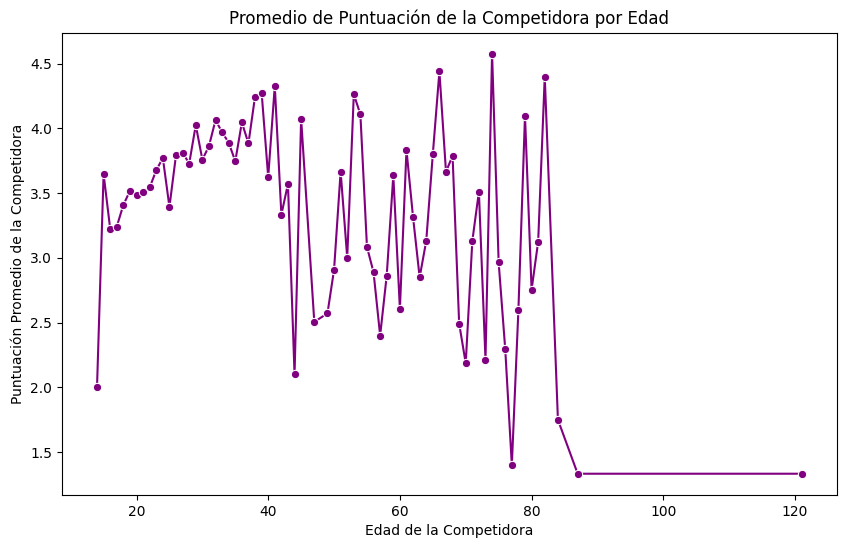

C:\Users\iagog\AppData\Local\Temp\ipykernel_12216\1090782285.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_points.index, y=average_points.values, palette='Set2')


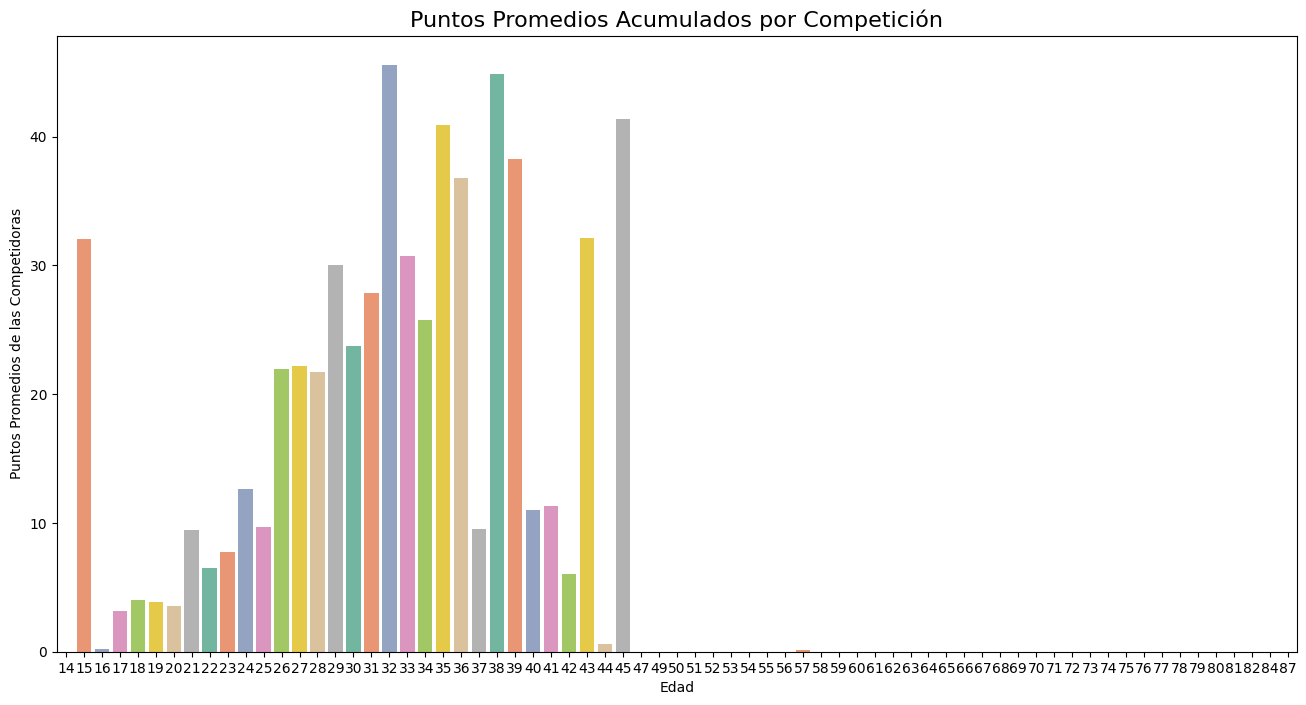

In [59]:
# Calcular la puntuación promedio por grupo de edad
age_avg_score = df_final.groupby('fencer_age')['fencer_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='fencer_age', y='fencer_score', data=age_avg_score, marker='o', color='purple')
plt.title('Promedio de Puntuación de la Competidora por Edad')
plt.xlabel('Edad de la Competidora')
plt.ylabel('Puntuación Promedio de la Competidora')
plt.show()

# Otro gráfico
average_points = df_final.groupby('age')['fencer_curr_pts'].mean().sort_values()

plt.figure(figsize=(16, 8))
sns.barplot(x=average_points.index, y=average_points.values, palette='Set2')

plt.title('Puntos Promedios Acumulados por Competición', fontsize=16)
plt.xlabel('Edad')
plt.ylabel('Puntos Promedios de las Competidoras')

plt.show()

In [19]:
# Correlación de Pearson entre variables numéricas
correlation_age_score = df_final['fencer_age'].corr(df_final['fencer_score'])
print(f"Correlación entre Edad del Competidor y Puntuación del Competidor: {correlation_age_score}")


Correlación entre Edad del Competidor y Puntuación del Competidor: 0.06829641015871074


## Edad oponente - Puntuación actual (numéricas)

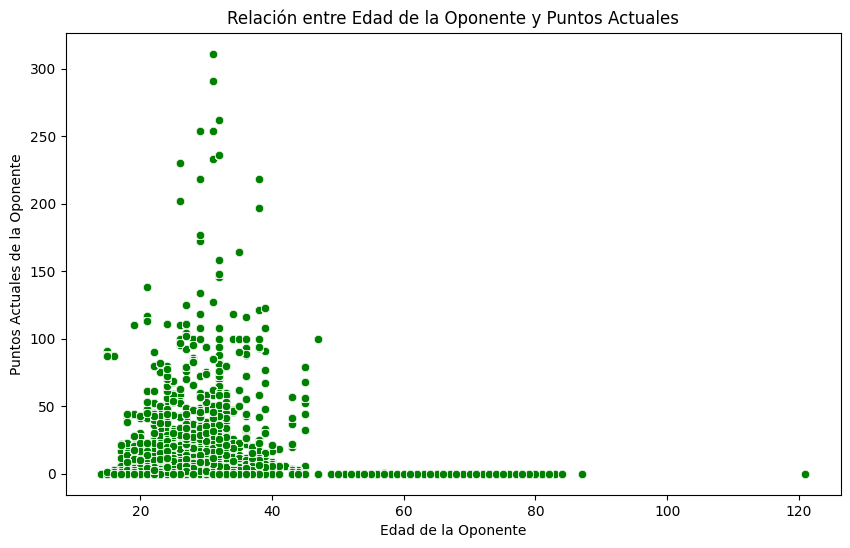

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='opp_age', y='opp_curr_pts', data=df_final, color='green')
plt.title('Relación entre Edad de la Oponente y Puntos Actuales')
plt.xlabel('Edad de la Oponente')
plt.ylabel('Puntos Actuales de la Oponente')
plt.show()


In [10]:
# Correlación de Pearson
correlation_opp_age_pts = df_final['opp_age'].corr(df_final['opp_curr_pts'])
print(f"Correlación entre Edad de la Oponente y Puntos Actuales: {correlation_opp_age_pts:.2f}")


Correlación entre Edad de la Oponente y Puntos Actuales: 0.27


## Puntuación actual - Victoria Inesperada (numérica-categórica)

C:\Users\iagog\AppData\Local\Temp\ipykernel_12216\1922877835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='upset', y='fencer_curr_pts', data=df_final, palette='viridis')


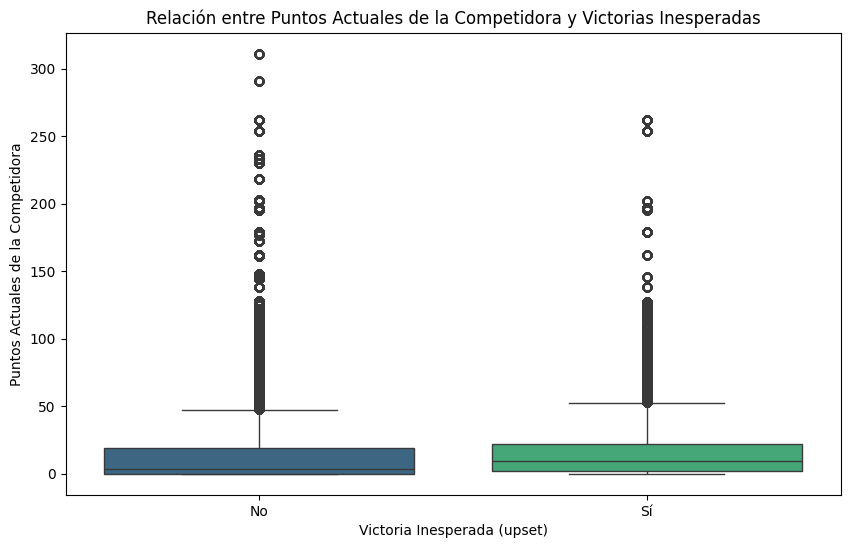

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='upset', y='fencer_curr_pts', data=df_final, palette='viridis')
plt.title('Relación entre Puntos Actuales de la Competidora y Victorias Inesperadas')
plt.xlabel('Victoria Inesperada (upset)')
plt.ylabel('Puntos Actuales de la Competidora')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


In [20]:
# Prueba U de Mann_Whitney entre variables numéricas-categóricas

from scipy.stats import mannwhitneyu

group_no_upset = df_final[df_final['upset'] == 0]['fencer_curr_pts']
group_yes_upset = df_final[df_final['upset'] == 1]['fencer_curr_pts']

stat, p_value = mannwhitneyu(group_no_upset, group_yes_upset)

print(f"Estadístico U: {stat:.2f}")
print(f"Valor p: {p_value:.4f}")

Estadístico U: 534533060646.50
Valor p: 0.0000


## País de la competidora - Victoria (numérica-categórica)

C:\Users\iagog\AppData\Local\Temp\ipykernel_12216\3234111203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=victorias_por_pais.index, y=victorias_por_pais.values, palette='coolwarm')


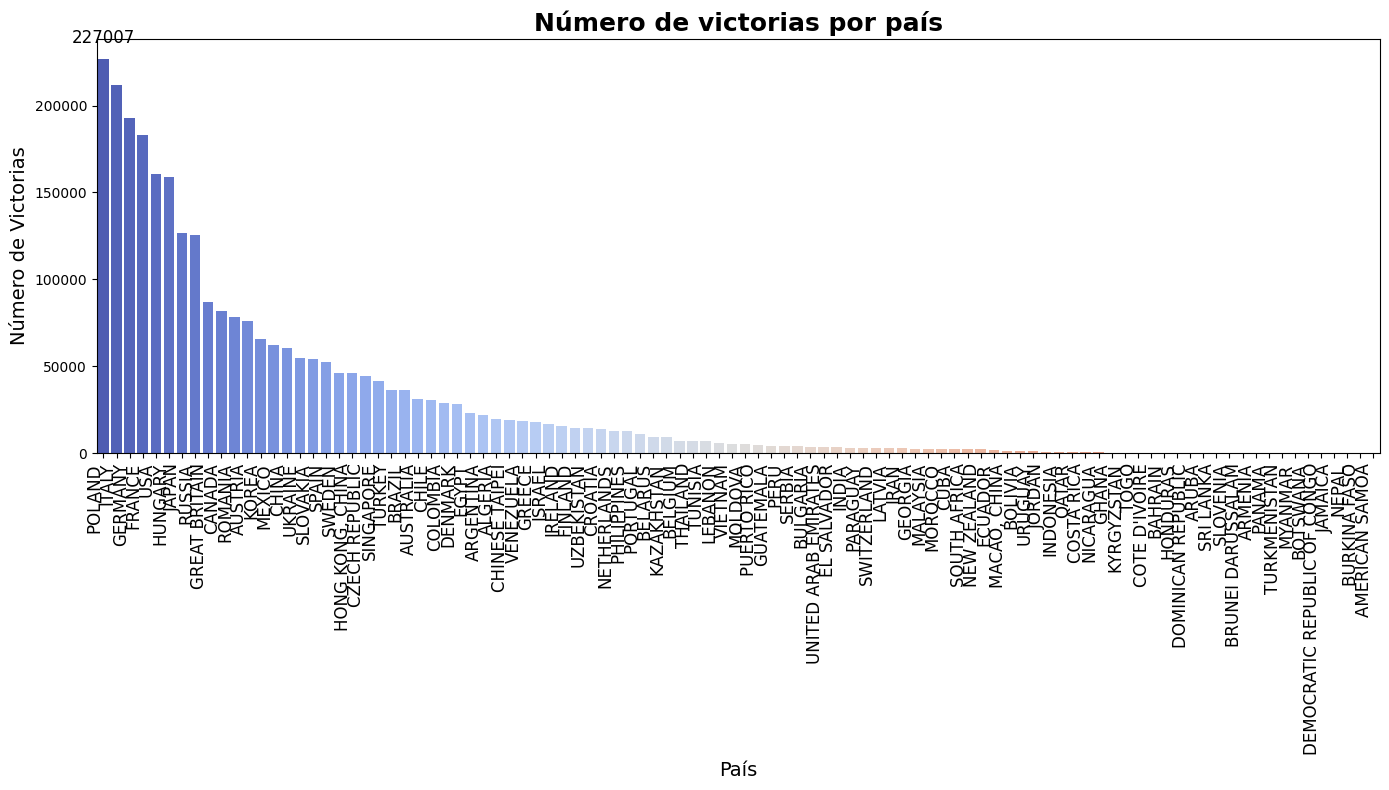

In [27]:
victorias_por_pais = df_final.groupby('country_x')['winner_ID'].count().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=victorias_por_pais.index, y=victorias_por_pais.values, palette='coolwarm')

plt.title('Número de victorias por país', fontsize=18, fontweight='bold')
plt.xlabel('País', fontsize=14)
plt.ylabel('Número de Victorias', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)  # Rotar las etiquetas del eje x para mejorar la legibilidad

ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=8)

plt.tight_layout()

plt.show()
